In [ ]:
import os
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Đường dẫn dữ liệu – chỉnh lại nếu bạn để nơi khác
DATA_PATH = Path("/content/drive/MyDrive/home_credit")

# Thư mục lưu intermediate EDA (view phân tích, không phải final feature)
INTERIM_PATH = DATA_PATH / "interim"
INTERIM_PATH.mkdir(exist_ok=True, parents=True)

RANDOM_STATE = 42

print("DATA_PATH:", DATA_PATH)
print("INTERIM_PATH:", INTERIM_PATH)

DATA_PATH: /content/drive/MyDrive/home_credit
INTERIM_PATH: /content/drive/MyDrive/home_credit/interim


In [ ]:
app_train = pd.read_csv(DATA_PATH / "application_train.csv")
app_test = pd.read_csv(DATA_PATH / "application_test.csv")
bureau = pd.read_csv(DATA_PATH / "bureau.csv")
bureau_balance = pd.read_csv(DATA_PATH / "bureau_balance.csv")
prev_app = pd.read_csv(DATA_PATH / "previous_application.csv")
installments = pd.read_csv(DATA_PATH / "installments_payments.csv")
pos_cash = pd.read_csv(DATA_PATH / "POS_CASH_balance.csv")
credit_card = pd.read_csv(DATA_PATH / "credit_card_balance.csv")

In [ ]:
tables = {
    "application_train": app_train,
    "application_test": app_test,
    "bureau": bureau,
    "bureau_balance": bureau_balance,
    "credit_card_balance": credit_card,
    "previous_application": prev_app,
    "installments_payments": installments,
    "pos_cash_balance": pos_cash,
}

In [ ]:
summary = []

for name, df in tables.items():
    summary.append({
        "table": name,
        "rows": df.shape[0],
        "cols": df.shape[1]
    })
    print("="*80)
    print(f"{name.upper()} — shape: {df.shape}")
    display(df.head(3))

summary_df = pd.DataFrame(summary)
summary_df

APPLICATION_TRAIN — shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

APPLICATION_TEST — shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.066,0.059,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.059,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


BUREAU — shape: (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


BUREAU_BALANCE — shape: (27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


CREDIT_CARD_BALANCE — shape: (3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


PREVIOUS_APPLICATION — shape: (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


INSTALLMENTS_PAYMENTS — shape: (13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


POS_CASH_BALANCE — shape: (10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


,table,rows,cols
0,application_train,307511,122
1,application_test,48744,121
2,bureau,1716428,17
3,bureau_balance,27299925,3
4,credit_card_balance,3840312,23
5,previous_application,1670214,37
6,installments_payments,13605401,8
7,pos_cash_balance,10001358,8


In [ ]:
# Sao lưu bản RAW của application_train để dùng cho Notebook 02
app_train_raw = app_train.copy()

## TARGET ANALYSIS – CLASS IMBALANCE

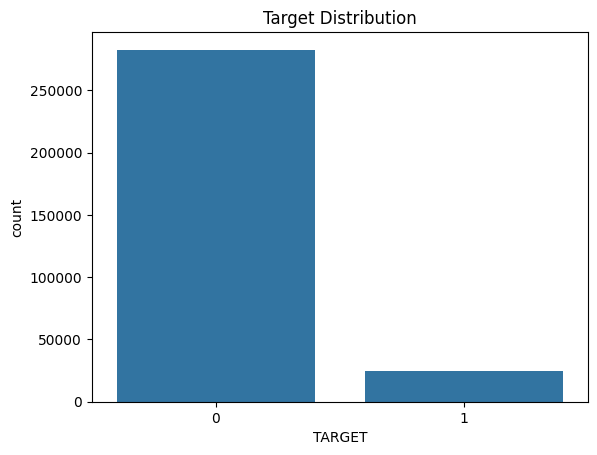

In [ ]:
app_train['TARGET'].value_counts(normalize= True)
sns.countplot(data= app_train, x= 'TARGET')
plt.title('Target Distribution')
plt.show()

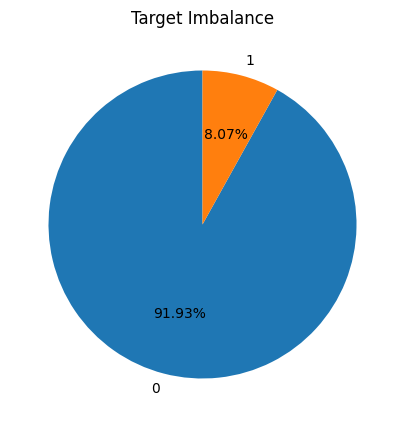

In [ ]:
target_counts = app_train["TARGET"].value_counts()
target_ratio = app_train["TARGET"].value_counts(normalize=True)
plt.figure(figsize=(5,5))
plt.pie(target_counts, labels=target_counts.index, autopct="%1.2f%%", startangle=90)
plt.title("Target Imbalance")
plt.show()

- Thường ~8% khách hàng TARGET=1 (default), dữ liệu mất cân bằng rõ.
 - Notebook 03 sẽ cần: class_weight='balanced' hoặc metric AUC-PR, F1,...

## MISSING VALUES – application_train

In [ ]:
def missing_values_table(df, sort=True):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * mis_val / len(df)
    mis_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_table.columns = ['Missing Values', '% of Total Values']
    mis_table = mis_table[mis_table['Missing Values'] > 0]
    if sort:
        mis_table = mis_table.sort_values('% of Total Values', ascending=False)
    return mis_table

missing_app = missing_values_table(app_train)
missing_app.head(30)

,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


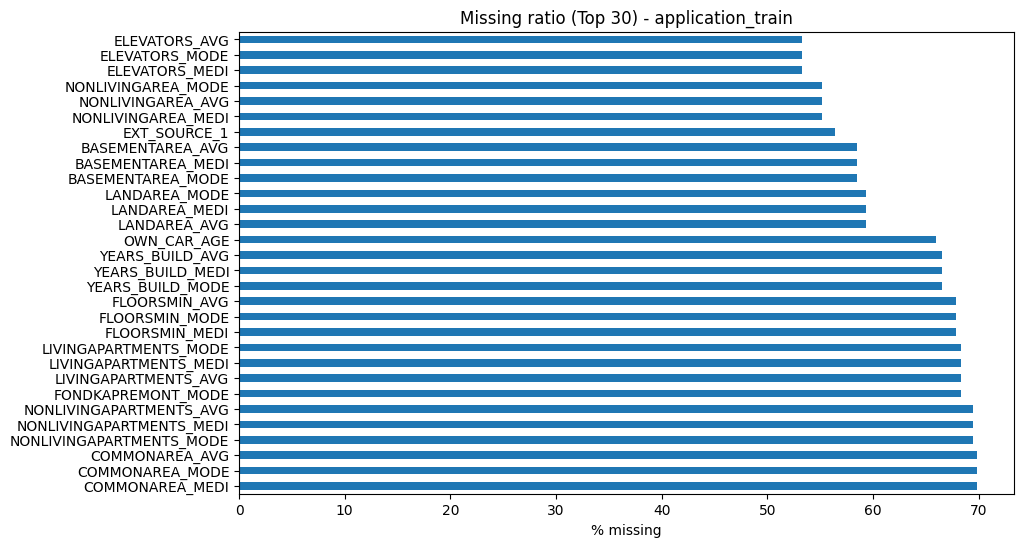

In [ ]:
plt.figure(figsize=(10,6))
missing_app.head(30)['% of Total Values'].plot(kind="barh")
plt.title("Missing ratio (Top 30) - application_train")
plt.xlabel("% missing")
plt.show()

- Nhóm *_AV G, *_MODE, *_MEDI: missing rất cao -> sau này thường:
   * tạo flag MISSING_GRADINGS,
   * hoặc xem missing như “không có / không áp dụng” thay vì fill bừa.
 - Một số cột quan trọng (EXT_SOURCE_*, AMT_INCOME_TOTAL,...) missing ít hơn,
 có thể dùng chiến lược impute truyền thống.

# CHECK SPECIAL / ANOMALIES – application_train

In [ ]:
# DAYS_EMPLOYED special value
app_train["DAYS_EMPLOYED"].value_counts().head()

,count
DAYS_EMPLOYED,
365243,55374
-200,156
-224,152
-199,151
-230,151


In [ ]:
special_employed = (app_train["DAYS_EMPLOYED"] == 365243).mean()
print(f"% bản ghi DAYS_EMPLOYED = 365243: {special_employed:.2%}")

% bản ghi DAYS_EMPLOYED = 365243: 18.01%


In [ ]:
# CODE_GENDER anomalies
app_train["CODE_GENDER"].value_counts()

,count
CODE_GENDER,
F,202448
M,105059
XNA,4


In [ ]:
app_train["NAME_FAMILY_STATUS"].value_counts()

,count
NAME_FAMILY_STATUS,
Married,196432
Single / not married,45444
Civil marriage,29775
Separated,19770
Widow,16088
Unknown,2


- DAYS_EMPLOYED = 365243 là mã “fake” (không đi làm / thông tin không có) ->
sau này trong Feature Engineering sẽ chuyển về NaN hoặc phân nhóm riêng.
- CODE_GENDER có 'XNA' rất ít -> có thể thay bằng giá trị phổ biến nhất (*mode*) hoặc drop.


# UNIVARIATE & BIVARIATE – NUMERIC FEATURES (application_train)


In [ ]:
# Tạo cột tuổi (năm) cho dễ nhìn
app_train["AGE_YEARS"] = (-app_train["DAYS_BIRTH"] / 365).round(1)

num_cols_basic = [
    "AGE_YEARS",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE"
]

display(app_train[num_cols_basic].describe().T)

,count,mean,std,min,25%,50%,75%,max
AGE_YEARS,307511.0,43.936992,11.956084,20.5,34.0,43.2,53.9,69.1
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.5,16524.0,24903.0,34596.0,258025.5
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.0,238500.0,450000.0,679500.0,4050000.0


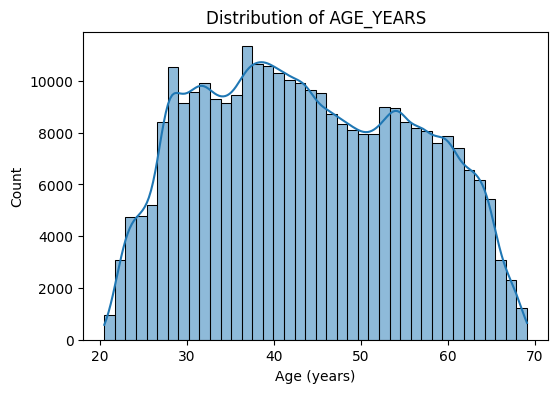

In [ ]:
# Hist + KDE cho AGE_YEARS
plt.figure(figsize=(6, 4))
sns.histplot(app_train["AGE_YEARS"], bins=40, kde=True)
plt.title("Distribution of AGE_YEARS")
plt.xlabel("Age (years)")
plt.show()

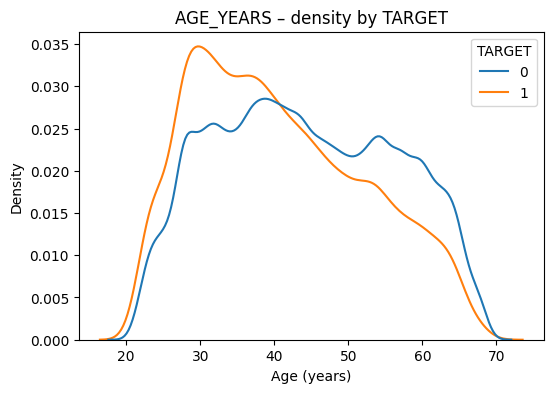

In [ ]:
# Bivariate: AGE_YEARS vs TARGET
plt.figure(figsize=(6, 4))
sns.kdeplot(
    data=app_train,
    x="AGE_YEARS",
    hue="TARGET",
    common_norm=False
)
plt.title("AGE_YEARS – density by TARGET")
plt.xlabel("Age (years)")
plt.show()

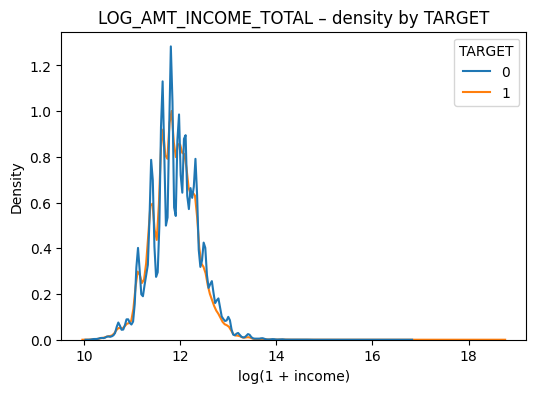

In [ ]:
# Bivariate: AMT_INCOME_TOTAL vs TARGET (log scale)
app_train["LOG_AMT_INCOME_TOTAL"] = np.log1p(app_train["AMT_INCOME_TOTAL"])

plt.figure(figsize=(6, 4))
sns.kdeplot(
    data=app_train,
    x="LOG_AMT_INCOME_TOTAL",
    hue="TARGET",
    common_norm=False
)
plt.title("LOG_AMT_INCOME_TOTAL – density by TARGET")
plt.xlabel("log(1 + income)")
plt.show()

- Nhìn 2 đường KDE giúp thấy nhóm default có xu hướng trẻ hơn / thu nhập thấp hơn hay không.
 - Đây là “tín hiệu” cho FE sau này: tạo bucket tuổi, thu nhập,...


## EXT_SOURCE_* – RISK SIGNAL


 Missing EXT_SOURCE ratios
EXT_SOURCE_1    0.563811
EXT_SOURCE_2    0.002146
EXT_SOURCE_3    0.198253
dtype: float64


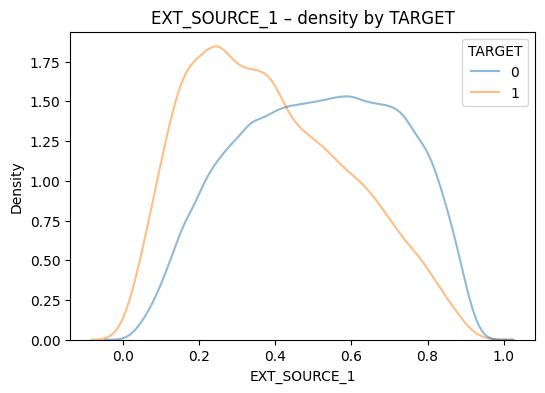

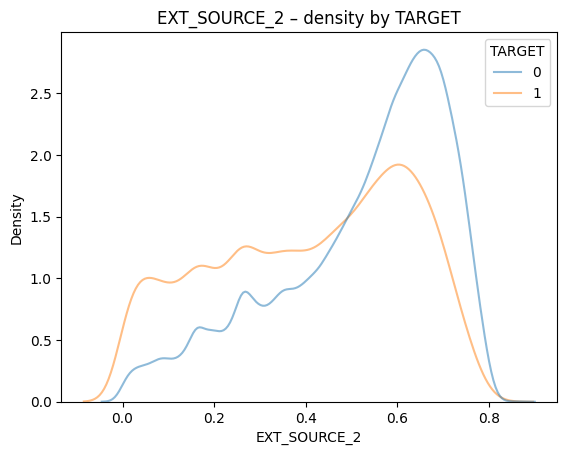

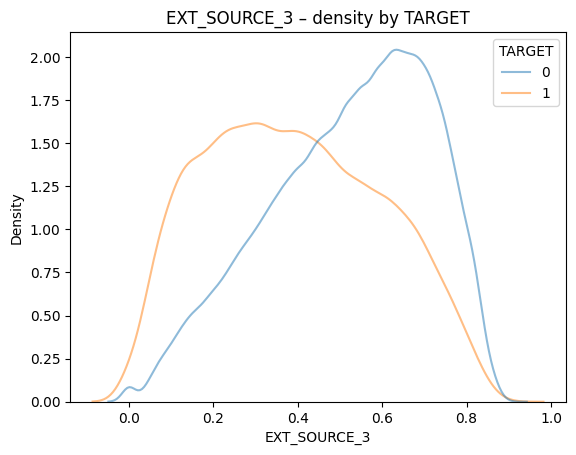

In [ ]:
ext_cols = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]
print("\n Missing EXT_SOURCE ratios")
print(app_train[ext_cols].isnull().mean())

plt.figure(figsize=(6, 4))
for c in ext_cols:
    sns.kdeplot(
        data=app_train,
        x=c,
        hue="TARGET",
        common_norm=False,
        fill=False,
        alpha=0.5
    )
    plt.title(f"{c} – density by TARGET")
    plt.xlabel(c)
    plt.show()

- EXT_SOURCE_* thường là các external score (0–1),
   phân bố giữa TARGET=0 và 1 lệch nhau rõ -> feature cực mạnh.
 - EDA phase: chỉ quan sát, FE phase: sẽ tạo mean/sum/var, interaction,...

## CATEGORICAL FEATURES – TARGET RATE BY CATEGORY

In [ ]:
def target_rate_by_category(df, col, min_count=100):
    """
    Tính target rate theo từng category của col.
    Chỉ giữ những category có số lượng >= min_count cho ổn định.
    """
    tmp = (df
           .groupby(col)["TARGET"]
           .agg(["count", "mean"])
           .rename(columns={"count": "n", "mean": "target_rate"})
           .reset_index())
    tmp = tmp[tmp["n"] >= min_count]

    tmp = tmp.sort_values("target_rate", ascending=False)

    print(f"\n=== {col} – target rate (n >= {min_count}) ===")
    display(tmp)

    plt.figure(figsize=(8, max(3, len(tmp) * 0.3)))
    sns.barplot(
        data=tmp,
        y=col,
        x="target_rate"
    )
    plt.title(f"{col} – TARGET rate by category")
    plt.xlabel("TARGET rate")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

    return tmp


=== NAME_EDUCATION_TYPE – target rate (n >= 200) ===


,NAME_EDUCATION_TYPE,n,target_rate
3,Lower secondary,3816,0.109277
4,Secondary / secondary special,218391,0.089399
2,Incomplete higher,10277,0.084850
1,Higher education,74863,0.053551


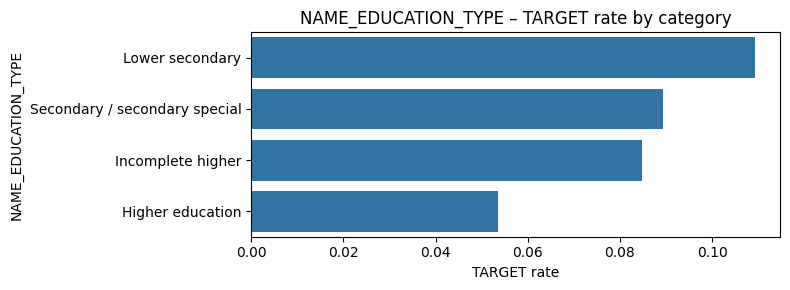


=== NAME_INCOME_TYPE – target rate (n >= 200) ===


,NAME_INCOME_TYPE,n,target_rate
7,Working,158774,0.095885
1,Commercial associate,71617,0.074843
4,State servant,21703,0.057550
3,Pensioner,55362,0.053864


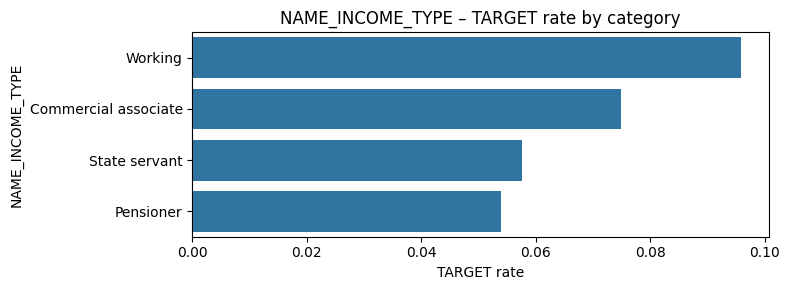


=== OCCUPATION_TYPE – target rate (n >= 200) ===


,OCCUPATION_TYPE,n,target_rate
9,Low-skill Laborers,2093,0.171524
4,Drivers,18603,0.113261
17,Waiters/barmen staff,1348,0.112760
16,Security staff,6721,0.107424
8,Laborers,55186,0.105788
2,Cooking staff,5946,0.104440
14,Sales staff,32102,0.096318
1,Cleaning staff,4653,0.096067
13,Realty agents,751,0.078562
15,Secretaries,1305,0.070498


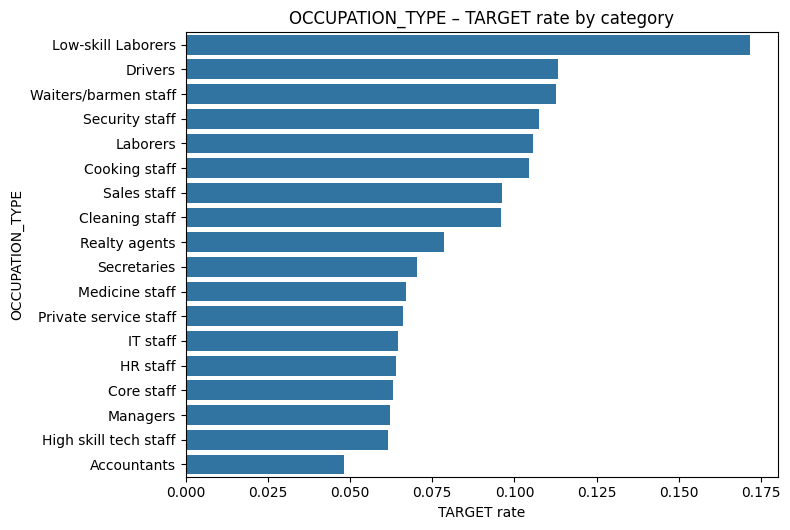


=== NAME_FAMILY_STATUS – target rate (n >= 200) ===


,NAME_FAMILY_STATUS,n,target_rate
0,Civil marriage,29775,0.099446
3,Single / not married,45444,0.098077
2,Separated,19770,0.081942
1,Married,196432,0.075599
5,Widow,16088,0.058242


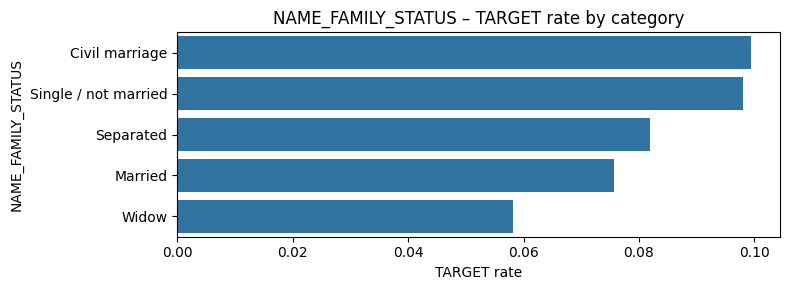


=== NAME_HOUSING_TYPE – target rate (n >= 200) ===


,NAME_HOUSING_TYPE,n,target_rate
4,Rented apartment,4881,0.123131
5,With parents,14840,0.116981
2,Municipal apartment,11183,0.085397
0,Co-op apartment,1122,0.079323
1,House / apartment,272868,0.077957
3,Office apartment,2617,0.065724


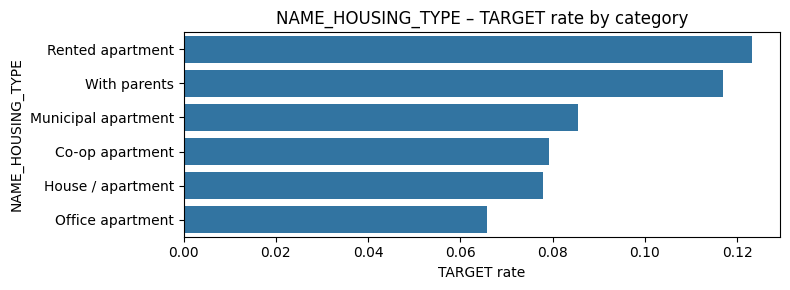


=== CODE_GENDER – target rate (n >= 200) ===


,CODE_GENDER,n,target_rate
1,M,105059,0.101419
0,F,202448,0.069993


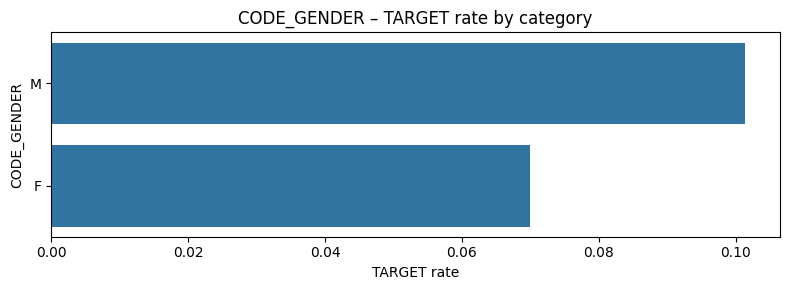

In [ ]:
cat_cols_to_check = [
    "NAME_EDUCATION_TYPE",
    "NAME_INCOME_TYPE",
    "OCCUPATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "CODE_GENDER"
]

for c in cat_cols_to_check:
    if c in app_train.columns:
        target_rate_by_category(app_train, c, min_count=200)

- Kết quả phần này dùng để:
   * Quyết định encode ordinal (ví dụ: education theo thứ tự rủi ro).
   * Gộp nhóm rare class hoặc risky class.
   * Giải thích business: nhóm nghề/ngồn thu nhập nào rủi ro cao.

# CONTEXTUAL EDA – BUREAU (RISK-BASED)

## Aggregate cơ bản theo SK_ID_CURR

In [ ]:
bureau_basic_agg = bureau.groupby("SK_ID_CURR").agg(
    N_BUREAU_LOANS=("SK_ID_BUREAU", "count"),
    N_ACTIVE_LOANS=("CREDIT_ACTIVE", lambda x: (x == "Active").sum()),
    N_CLOSED_LOANS=("CREDIT_ACTIVE", lambda x: (x == "Closed").sum()),
    N_BAD_DEBT_LOANS=("CREDIT_ACTIVE", lambda x: (x == "Bad debt").sum()),
    TOTAL_BUREAU_DEBT=("AMT_CREDIT_SUM_DEBT", "sum"),
    MAX_DAYS_CREDIT=("DAYS_CREDIT", "max"),
    MIN_DAYS_CREDIT=("DAYS_CREDIT", "min")
).reset_index()

print("\n bureau_basic_agg.head()")
display(bureau_basic_agg.head())


 bureau_basic_agg.head()


,SK_ID_CURR,N_BUREAU_LOANS,N_ACTIVE_LOANS,N_CLOSED_LOANS,N_BAD_DEBT_LOANS,TOTAL_BUREAU_DEBT,MAX_DAYS_CREDIT,MIN_DAYS_CREDIT
0,100001,7,3,4,0,596686.5,-49,-1572
1,100002,8,2,6,0,245781.0,-103,-1437
2,100003,4,1,3,0,0.0,-606,-2586
3,100004,2,0,2,0,0.0,-408,-1326
4,100005,3,2,1,0,568408.5,-62,-373


In [ ]:
app_bureau_eda = app_train.merge(
    bureau_basic_agg,
    on="SK_ID_CURR",
    how="left"
)

## Quan hệ: số khoản vay ở bureau vs TARGET

In [ ]:
# Bucket theo quantile của N_BUREAU_LOANS
app_bureau_eda["N_BUREAU_BUCKET"] = pd.qcut(
    app_bureau_eda["N_BUREAU_LOANS"].fillna(0),
    q=5,
    labels=False,
    duplicates="drop"
)

target_by_bureau_bucket = (app_bureau_eda
                           .groupby("N_BUREAU_BUCKET")["TARGET"]
                           .mean()
                           .reset_index())

print("\n TARGET rate by N_BUREAU_BUCKET")
display(target_by_bureau_bucket)


 TARGET rate by N_BUREAU_BUCKET


,N_BUREAU_BUCKET,TARGET
0,0,0.094329
1,1,0.077144
2,2,0.072742
3,3,0.072954
4,4,0.080657


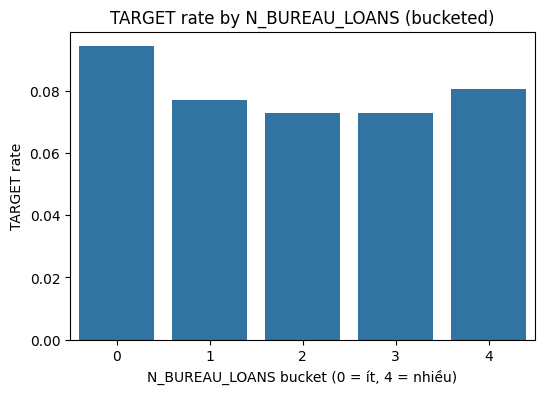

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=target_by_bureau_bucket,
    x="N_BUREAU_BUCKET",
    y="TARGET"
)
plt.title("TARGET rate by N_BUREAU_LOANS (bucketed)")
plt.xlabel("N_BUREAU_LOANS bucket (0 = ít, 4 = nhiều)")
plt.ylabel("TARGET rate")
plt.show()

## BAD DEBT loans ở bureau vs TARGET

In [ ]:
app_bureau_eda["HAS_BAD_DEBT"] = (app_bureau_eda["N_BAD_DEBT_LOANS"] > 0).astype(int)

target_by_bad_debt_flag = (app_bureau_eda
                           .groupby("HAS_BAD_DEBT")["TARGET"]
                           .mean()
                           .reset_index())

print("\n TARGET rate by HAS_BAD_DEBT (bureau)")
display(target_by_bad_debt_flag)


 TARGET rate by HAS_BAD_DEBT (bureau)


,HAS_BAD_DEBT,TARGET
0,0,0.080721
1,1,0.200000


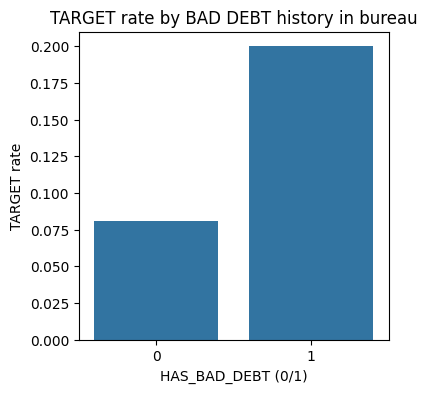

In [ ]:
plt.figure(figsize=(4, 4))
sns.barplot(
    data=target_by_bad_debt_flag,
    x="HAS_BAD_DEBT",
    y="TARGET"
)
plt.title("TARGET rate by BAD DEBT history in bureau")
plt.xlabel("HAS_BAD_DEBT (0/1)")
plt.ylabel("TARGET rate")
plt.show()

- Phần này chính là risk-based aggregation level đơn giản:
   * N_BAD_DEBT_LOANS > 0 thường làm TARGET↑.
 - Sang Notebook 02, ta sẽ làm bản aggregate chi tiết hơn
   (thêm time window, ratio,…), nhưng logic đã rõ ràng.

## BUREAU_BALANCE – TIME-WINDOW & DELINQUENCY (MINI EDA)


In [ ]:
# Map STATUS thành DPD bucket: 0, 1-30, 31-60, 61-90, 91-120, 120+ (hoặc sold)
def status_to_dpd(s):
    """
      Mapping STATUS trong bureau_balance:
      '0' = current (no DPD)
      '1' = 1-29 days overdue
      '2' = 30-59 days overdue
      '3' = 60-89 days overdue
      '4' = 90-119 days overdue
      '5' = 120+ days overdue
      'C' = closed/paid off
      'X' = no loan for the month
      """
    if s == "0":
        return "dpd_0"
    elif s == "1":
        return "dpd_1_29"
    elif s == "2":
        return "dpd_30_59"
    elif s == "3":
        return "dpd_60_89"
    elif s == "4":
        return "dpd_90_119"
    elif s == "5":
        return "dpd_120_plus"
    elif s == "C":
        return "closed"
    elif s == "X":
        return "no_info"
    return "unknown"

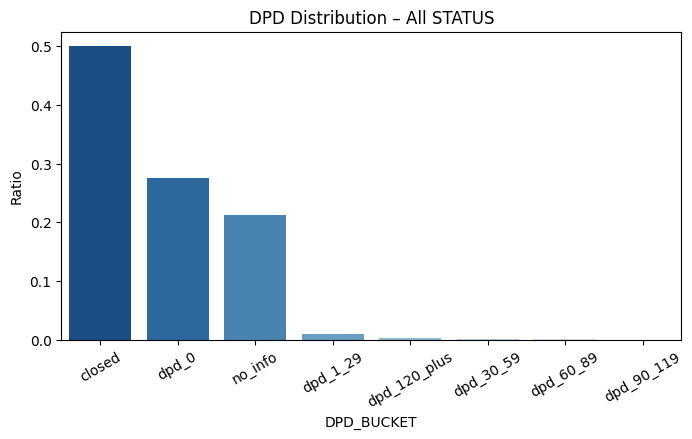

In [ ]:
dpd_dist = (
    bureau_balance["STATUS"]
    .astype(str)
    .map(status_to_dpd)
    .value_counts(normalize=True)
)

dpd_df = dpd_dist.reset_index()
dpd_df.columns = ["DPD_BUCKET", "ratio"]

plt.figure(figsize=(8,4))
sns.barplot(data=dpd_df, x="DPD_BUCKET", y="ratio", palette="Blues_r")
plt.xticks(rotation=30)
plt.title("DPD Distribution – All STATUS")
plt.ylabel("Ratio")
plt.show()


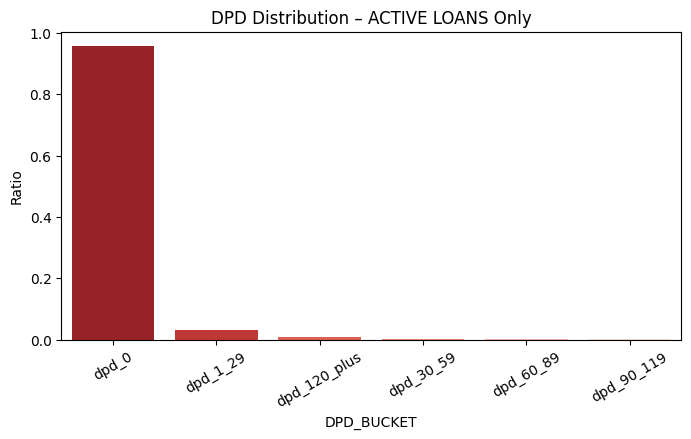

In [ ]:
active_bal = bureau_balance[
    bureau_balance["STATUS"].isin(["0","1","2","3","4","5"])
]

dpd_active_dist = (
    active_bal["STATUS"]
    .astype(str)
    .map(status_to_dpd)
    .value_counts(normalize=True)
)

dpd_active_df = dpd_active_dist.reset_index()
dpd_active_df.columns = ["DPD_BUCKET", "ratio"]

plt.figure(figsize=(8,4))
sns.barplot(data=dpd_active_df, x="DPD_BUCKET", y="ratio", palette="Reds_r")
plt.xticks(rotation=30)
plt.title("DPD Distribution – ACTIVE LOANS Only")
plt.ylabel("Ratio")
plt.show()


- 70%+ tháng = CLOSED hoặc “no info” (X)

- 25–28% = On-time

- <5% = Overdue

→ DPD hiếm là bình thường.

Ý tưởng FE sau này:
 - Đếm số tháng thuộc mỗi DPD bucket theo SK_ID_CURR
   -> feature về lịch sử quá hạn chi tiết.

# CONTEXTUAL EDA – PREVIOUS_APPLICATION

In [ ]:
prev_agg_basic = prev_app.groupby("SK_ID_CURR").agg(
    N_PREV_APPS=("SK_ID_PREV", "count"),
    N_PREV_APPROVED=("NAME_CONTRACT_STATUS", lambda x: (x == "Approved").sum()),
    N_PREV_REFUSED=("NAME_CONTRACT_STATUS", lambda x: (x == "Refused").sum()),
    LAST_DECISION_DAYS=("DAYS_DECISION", "max")
).reset_index()

prev_agg_basic["PREV_REFUSED_RATE"] = (
    prev_agg_basic["N_PREV_REFUSED"] /
    prev_agg_basic["N_PREV_APPS"].replace(0, np.nan)
)

display(prev_agg_basic.head())

,SK_ID_CURR,N_PREV_APPS,N_PREV_APPROVED,N_PREV_REFUSED,LAST_DECISION_DAYS,PREV_REFUSED_RATE
0,100001,1,1,0,-1740,0.0
1,100002,1,1,0,-606,0.0
2,100003,3,3,0,-746,0.0
3,100004,1,1,0,-815,0.0
4,100005,2,1,0,-315,0.0


In [ ]:
app_prev_eda = app_train.merge(
    prev_agg_basic,
    on="SK_ID_CURR",
    how="left"
)


In [ ]:
# Bucket theo N_PREV_APPS
app_prev_eda["N_PREV_APPS_BUCKET"] = pd.qcut(
    app_prev_eda["N_PREV_APPS"].fillna(0),
    q=5,
    labels=False,
    duplicates="drop"
)

target_by_prev_bucket = (app_prev_eda
                         .groupby("N_PREV_APPS_BUCKET")["TARGET"]
                         .mean()
                         .reset_index())

print("\n TARGET rate by N_PREV_APPS_BUCKET")
display(target_by_prev_bucket)


 TARGET rate by N_PREV_APPS_BUCKET


,N_PREV_APPS_BUCKET,TARGET
0,0,0.077986
1,1,0.078368
2,2,0.075633
3,3,0.079913
4,4,0.091715


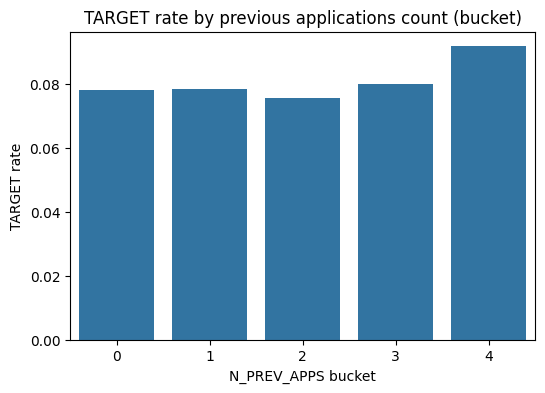

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=target_by_prev_bucket,
    x="N_PREV_APPS_BUCKET",
    y="TARGET"
)
plt.title("TARGET rate by previous applications count (bucket)")
plt.xlabel("N_PREV_APPS bucket")
plt.ylabel("TARGET rate")
plt.show()

In [ ]:
# Quan hệ PREV_REFUSED_RATE vs TARGET (chia quantile)
app_prev_eda["PREV_REFUSED_RATE_Q"] = pd.qcut(
    app_prev_eda["PREV_REFUSED_RATE"].fillna(0),
    q=4,
    labels=False,
    duplicates="drop"
)

target_by_prev_refused = (app_prev_eda
                          .groupby("PREV_REFUSED_RATE_Q")["TARGET"]
                          .mean()
                          .reset_index())

print("\n TARGET rate by PREV_REFUSED_RATE_Q")
display(target_by_prev_refused)


 TARGET rate by PREV_REFUSED_RATE_Q


,PREV_REFUSED_RATE_Q,TARGET
0,0,0.070397
1,1,0.111758


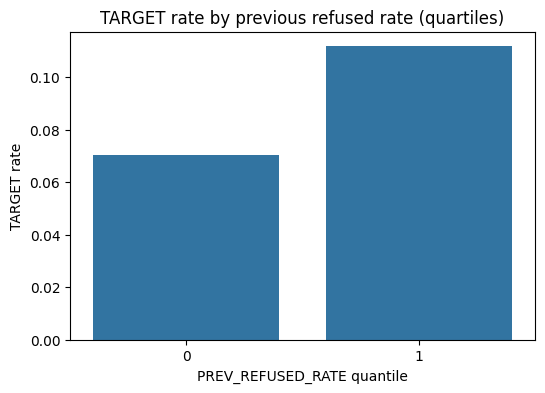

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=target_by_prev_refused,
    x="PREV_REFUSED_RATE_Q",
    y="TARGET"
)
plt.title("TARGET rate by previous refused rate (quartiles)")
plt.xlabel("PREV_REFUSED_RATE quantile")
plt.ylabel("TARGET rate")
plt.show()

- Đây là risk-based aggregation rõ: khách từng bị từ chối nhiều lần thường rủi ro cao.
 - Feature sau này: đếm số lần Refused, ratio Refused/Total,...


# CONTEXTUAL EDA – INSTALLMENTS (PAYMENT BEHAVIOR)

In [ ]:
# Tạo một số feature EDA-level đơn giản về trễ / sớm
inst = installments.copy()

# DIFF = DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT:
#   > 0: trả muộn (entry sau ngày instalment)
#   < 0: trả sớm
inst["PAYMENT_DELAY_DAYS"] = inst["DAYS_ENTRY_PAYMENT"] - inst["DAYS_INSTALMENT"]

inst_agg_basic = inst.groupby("SK_ID_CURR").agg(
    N_INSTALMENTS=("NUM_INSTALMENT_NUMBER", "count"),
    LATE_MEAN=("PAYMENT_DELAY_DAYS", lambda x: x[x > 0].mean() if (x > 0).any() else 0),
    LATE_MAX=("PAYMENT_DELAY_DAYS", lambda x: x[x > 0].max() if (x > 0).any() else 0),
    LATE_COUNT=("PAYMENT_DELAY_DAYS", lambda x: (x > 0).sum()),
    EARLY_MEAN=("PAYMENT_DELAY_DAYS", lambda x: x[x < 0].mean() if (x < 0).any() else 0),
    EARLY_MIN=("PAYMENT_DELAY_DAYS", lambda x: x[x < 0].min() if (x < 0).any() else 0)
).reset_index()

display(inst_agg_basic.head())

,SK_ID_CURR,N_INSTALMENTS,LATE_MEAN,LATE_MAX,LATE_COUNT,EARLY_MEAN,EARLY_MIN
0,100001,7,11.0,11.0,1,-15.500000,-36.0
1,100002,19,0.0,0.0,0,-20.421053,-31.0
2,100003,25,0.0,0.0,0,-7.160000,-14.0
3,100004,3,0.0,0.0,0,-7.666667,-11.0
4,100005,9,1.0,1.0,1,-26.625000,-37.0


In [ ]:
app_inst_eda = app_train.merge(
    inst_agg_basic,
    on="SK_ID_CURR",
    how="left"
)

# Biến cờ: từng bị trả muộn hay chưa
app_inst_eda["HAS_LATE_PAYMENT"] = (app_inst_eda["LATE_MAX"] > 0).astype(float)

target_by_late_flag = (app_inst_eda
                       .groupby("HAS_LATE_PAYMENT")["TARGET"]
                       .mean()
                       .reset_index())

print("\n TARGET rate by HAS_LATE_PAYMENT")
display(target_by_late_flag)


 TARGET rate by HAS_LATE_PAYMENT


,HAS_LATE_PAYMENT,TARGET
0,0.0,0.067155
1,1.0,0.094084


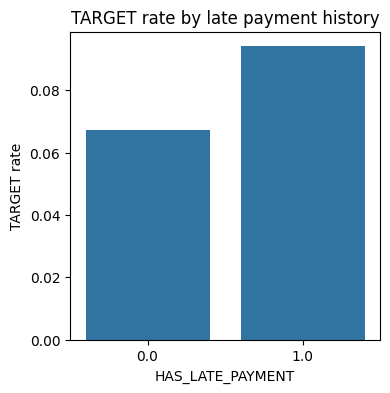

In [ ]:
plt.figure(figsize=(4, 4))
sns.barplot(
    data=target_by_late_flag,
    x="HAS_LATE_PAYMENT",
    y="TARGET"
)
plt.title("TARGET rate by late payment history")
plt.xlabel("HAS_LATE_PAYMENT")
plt.ylabel("TARGET rate")
plt.show()

- Đây là “behavioral feature”: người từng trả muộn có rủi ro cao hơn.
 - Sang FE, ta sẽ thêm time-window (6–12–24 tháng gần nhất) + sum/ratio.

# CONTEXTUAL EDA – CREDIT_CARD & POS_CASH (UTILIZATION & DPD)

## CREDIT_CARD – đơn giản hóa: 1 số feature EDA-level

In [ ]:
cc = credit_card.copy()

# Utilization = AMT_BALANCE / AMT_CREDIT_LIMIT_ACTUAL
# Clip utilization ở 200% để xử lý over-limit cases
cc["UTILIZATION"] = cc["AMT_BALANCE"] / (cc["AMT_CREDIT_LIMIT_ACTUAL"] + 1e-6).clip(0, 2)

cc_agg_basic = cc.groupby("SK_ID_CURR").agg(
    N_CC_MONTHS=("MONTHS_BALANCE", "count"),
    MEAN_UTILIZATION=("UTILIZATION", "mean"),
    MAX_UTILIZATION=("UTILIZATION", "max")
).reset_index()

display(cc_agg_basic.head())

,SK_ID_CURR,N_CC_MONTHS,MEAN_UTILIZATION,MAX_UTILIZATION
0,100006,6,0.000000,0.00
1,100011,74,27241.055574,94500.00
2,100013,96,9079.959609,80710.11
3,100021,17,0.000000,0.00
4,100023,8,0.000000,0.00


In [ ]:
app_cc_eda = app_train.merge(
    cc_agg_basic,
    on="SK_ID_CURR",
    how="left"
)

In [ ]:
# Bucket theo MEAN_UTILIZATION
app_cc_eda["MEAN_UTIL_BUCKET"] = pd.qcut(
    app_cc_eda["MEAN_UTILIZATION"].fillna(0),
    q=4,
    labels=False,
    duplicates="drop"
)

target_by_cc_util = (app_cc_eda
                     .groupby("MEAN_UTIL_BUCKET")["TARGET"]
                     .mean()
                     .reset_index())

print("\nTARGET rate by MEAN_UTIL_BUCKET (credit_card)")
display(target_by_cc_util)


TARGET rate by MEAN_UTIL_BUCKET (credit_card)


,MEAN_UTIL_BUCKET,TARGET
0,0,0.075845
1,1,0.101058


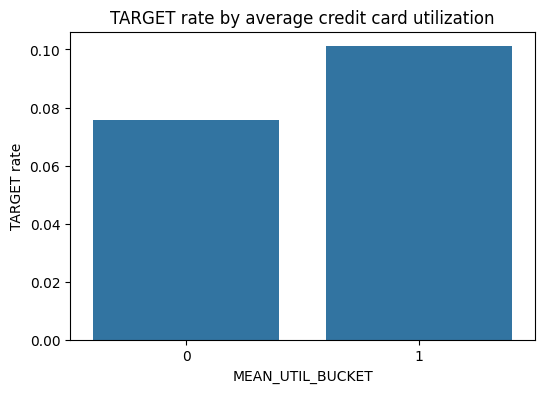

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=target_by_cc_util,
    x="MEAN_UTIL_BUCKET",
    y="TARGET"
)
plt.title("TARGET rate by average credit card utilization")
plt.xlabel("MEAN_UTIL_BUCKET")
plt.ylabel("TARGET rate")
plt.show()

## POS_CASH – đơn giản hóa: DPD & số kỳ trả

In [ ]:
pos = pos_cash.copy()

pos_agg_basic = pos.groupby("SK_ID_CURR").agg(
    N_POS_MONTHS=("MONTHS_BALANCE", "count"),
    MEAN_SK_DPD=("SK_DPD", lambda x: x.fillna(0).mean()),
    MAX_SK_DPD=("SK_DPD", lambda x: x.fillna(0).max()),
    MEAN_SK_DPD_DEF=("SK_DPD_DEF", lambda x: x.fillna(0).mean()),
    MAX_SK_DPD_DEF=("SK_DPD_DEF", lambda x: x.fillna(0).max())
).reset_index()

display(pos_agg_basic.head())

,SK_ID_CURR,N_POS_MONTHS,MEAN_SK_DPD,MAX_SK_DPD,MEAN_SK_DPD_DEF,MAX_SK_DPD_DEF
0,100001,9,0.777778,7,0.777778,7
1,100002,19,0.000000,0,0.000000,0
2,100003,28,0.000000,0,0.000000,0
3,100004,4,0.000000,0,0.000000,0
4,100005,11,0.000000,0,0.000000,0


In [ ]:
app_pos_eda = app_train.merge(
    pos_agg_basic,
    on="SK_ID_CURR",
    how="left"
)

Distribution of MAX_SK_DPD:


,MAX_SK_DPD
count,289444.000000
mean,15.697644
std,153.169246
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4231.000000


MAX_SK_DPD
0.0    234761
1.0      5027
2.0      4180
3.0      3717
4.0      3269
5.0      3002
6.0      2798
7.0      2485
8.0      2138
9.0      1960
Name: count, dtype: int64


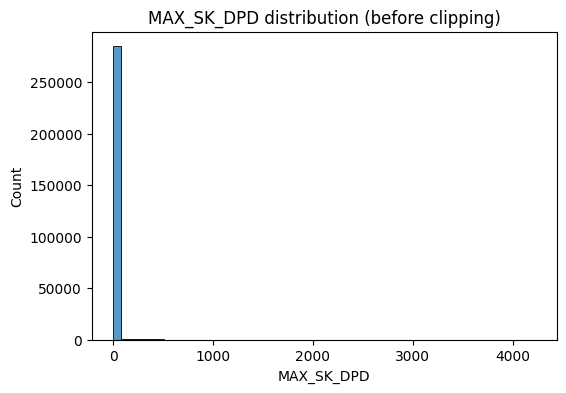

In [ ]:
# Kiểm tra phân phối MAX_SK_DPD

print("Distribution of MAX_SK_DPD:")
display(app_pos_eda["MAX_SK_DPD"].describe())
print(app_pos_eda["MAX_SK_DPD"].value_counts().head(10))

plt.figure(figsize=(6,4))
sns.histplot(app_pos_eda["MAX_SK_DPD"], bins=50)
plt.title("MAX_SK_DPD distribution (before clipping)")
plt.show()

96% khách hàng có DPD = 0 → quantile 25–50–75 đều bằng 0

qcut thất bại → trả về 1 bin duy nhất

Không dùng được để phân tích.

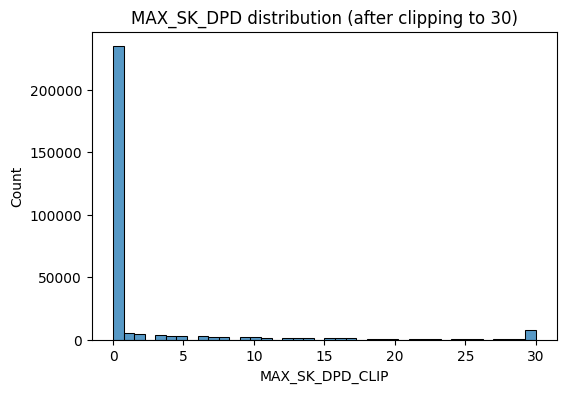

In [ ]:
# 3) Xử lý OUTLIER (có giá trị lên đến 4231)
# ===============================
CLIP_THRESHOLD = 30   # 30 là giá trị chuẩn trong risk modeling

app_pos_eda["MAX_SK_DPD_CLIP"] = app_pos_eda["MAX_SK_DPD"].clip(upper=CLIP_THRESHOLD)

plt.figure(figsize=(6,4))
sns.histplot(app_pos_eda["MAX_SK_DPD_CLIP"], bins=40)
plt.title("MAX_SK_DPD distribution (after clipping to 30)")
plt.show()


Trong POS_CASH, giá trị DPD thỉnh thoảng có outlier rất lớn do record lỗi hoặc khoản vay bất thường.

Ngân hàng thường clip về 30 ngày cho các phân tích risk.

In [ ]:
def bucket_dpd(x):
    """
    0 = không nợ
    1 = nợ 1 ngày
    2 = nợ 2 ngày
    3 = nợ 3 ngày
    4 = nợ 4-30 ngày (sau clipping)
    """
    if pd.isna(x):
        return 0
    if x == 0:
        return 0
    elif x == 1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    else:
        return 4

app_pos_eda["MAX_SK_DPD_BUCKET"] = app_pos_eda["MAX_SK_DPD_CLIP"].apply(bucket_dpd)

display(app_pos_eda["MAX_SK_DPD_BUCKET"].value_counts().sort_index())


,count
MAX_SK_DPD_BUCKET,
0,252828
1,5027
2,4180
3,3717
4,41759


Đây là grouping đúng chuẩn ngành:

0 = không nợ

1 = nợ nhẹ

2 = 30 ngày

3 = 60 ngày

4 = ≥90 ngày (rủi ro rất cao)

In [ ]:
# 5) Target rate theo bucket
# ===============================
target_by_pos_dpd = (
    app_pos_eda.groupby("MAX_SK_DPD_BUCKET")["TARGET"]
    .mean()
    .reset_index()
)

print("\n TARGET rate by MAX_SK_DPD_BUCKET (POS_CASH)")
display(target_by_pos_dpd)



 TARGET rate by MAX_SK_DPD_BUCKET (POS_CASH)


,MAX_SK_DPD_BUCKET,TARGET
0,0,0.076439
1,1,0.088124
2,2,0.098804
3,3,0.099005
4,4,0.102373


,MAX_SK_DPD_BUCKET,TARGET_RATE
0,0,0.076439
1,1,0.088124
2,2,0.098804
3,3,0.099005
4,4,0.102373


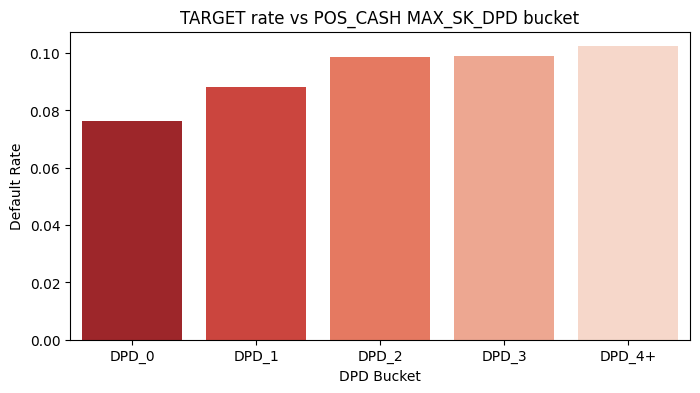

In [ ]:
# Visualization: Target rate trend
target_by_pos_dpd.rename(columns={"TARGET": "TARGET_RATE"}, inplace=True)
display(target_by_pos_dpd)

labels = ['DPD_0', 'DPD_1', 'DPD_2', 'DPD_3', 'DPD_4+']
plt.figure(figsize=(8,4))
sns.barplot(
    data=target_by_pos_dpd,
    x="MAX_SK_DPD_BUCKET",
    y="TARGET_RATE",
    palette="Reds_r"
)
plt.xticks(range(5), labels)
plt.title("TARGET rate vs POS_CASH MAX_SK_DPD bucket")
plt.ylabel("Default Rate")
plt.xlabel("DPD Bucket")
plt.show()


- Hai bảng này cung cấp view về hành vi sử dụng thẻ / POS.
 - Sau này FE có thể thêm:
   * Rolling window cho 6–12–36 tháng,
   * Flag utilisation > 100%, v.v.


# EDA VIEW: MERGE SOME BASIC RISK FEATURES

Ở đây ta tạo một bản "app_merged_eda" chỉ chứa:
 - application_train (gốc)
 - một số aggregate cơ bản từ bureau, previous_app, installments, cc, pos  

Bản này dùng để:
 - tiện EDA đa biến (multi-variate),
 - làm tài liệu tham khảo cho FE

In [ ]:
app_merged_eda = app_train.copy()

for df_agg, key, prefix in [
    (bureau_basic_agg, "SK_ID_CURR", "BUREAU_"),
    (prev_agg_basic, "SK_ID_CURR", "PREV_"),
    (inst_agg_basic, "SK_ID_CURR", "INST_"),
    (cc_agg_basic, "SK_ID_CURR", "CC_"),
    (pos_agg_basic, "SK_ID_CURR", "POS_"),
]:
    # Đổi tên cột để tránh trùng
    df_tmp = df_agg.copy()
    rename_map = {
        c: prefix + c
        for c in df_tmp.columns
        if c != key
    }
    df_tmp = df_tmp.rename(columns=rename_map)

    app_merged_eda = app_merged_eda.merge(
        df_tmp,
        on=key,
        how="left"
    )

In [ ]:
print(app_merged_eda.shape)
display(app_merged_eda.head())

# Lưu ra parquet cho Notebook 02 dùng nếu cần EDA view
app_train_raw.to_parquet(INTERIM_PATH / "application_train_raw.parquet")
app_merged_eda.to_parquet(INTERIM_PATH / "app_merged_eda.parquet")


(307511, 150)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,LOG_AMT_INCOME_TOTAL,BUREAU_N_BUREAU_LOANS,BUREAU_N_ACTIVE_LOANS,BUREAU_N_CLOSED_LOANS,BUREAU_N_BAD_DEBT_LOANS,BUREAU_TOTAL_BUREAU_DEBT,BUREAU_MAX_DAYS_CREDIT,BUREAU_MIN_DAYS_CREDIT,PREV_N_PREV_APPS,PREV_N_PREV_APPROVED,PREV_N_PREV_REFUSED,PREV_LAST_DECISION_DAYS,PREV_PREV_REFUSED_RATE,INST_N_INSTALMENTS,INST_LATE_MEAN,INST_LATE_MAX,INST_LATE_COUNT,INST_EARLY_MEAN,INST_EARLY_MIN,CC_N_CC_MONTHS,CC_MEAN_UTILIZATION,CC_MAX_UTILIZATION,POS_N_POS_MONTHS,POS_MEAN_SK_DPD,POS_MAX_SK_DPD,POS_MEAN_SK_DPD_DEF,POS_MAX_SK_DPD_DEF
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.9,12.218500,8.0,2.0,6.0,0.0,245781.0,-103.0,-1437.0,1.0,1.0,0.0,-606.0,0.000000,19.0,0.0000,0.0,0.0,-20.421053,-31.0,NaN,NaN,NaN,19.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.080

In [ ]:
import pandas as pd
from pathlib import Path

DATA_PATH = Path("/content/drive/MyDrive/home_credit")
INTERIM_PATH = DATA_PATH / "interim"

app_raw = pd.read_parquet(INTERIM_PATH / "application_train_raw.parquet")
app_eda = pd.read_parquet(INTERIM_PATH / "app_merged_eda.parquet")

print(app_raw.shape)
print(app_eda.shape)


(307511, 122)
(307511, 150)


In [ ]:
# ===== IQR OUTLIER CHECK – một số numeric quan trọng =====
iqr_cols = [
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3"
]

iqr_summary = []

for col in iqr_cols:
    series = app_train[col].dropna()
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_rate = ((series < lower) | (series > upper)).mean()

    iqr_summary.append({
        "feature": col,
        "Q1": q1,
        "Q3": q3,
        "IQR": iqr,
        "lower_bound": lower,
        "upper_bound": upper,
        "outlier_rate": outlier_rate
    })

iqr_df = pd.DataFrame(iqr_summary)
print("\nIQR-based outlier summary:")
display(iqr_df.sort_values("outlier_rate", ascending=False))



IQR-based outlier summary:


,feature,Q1,Q3,IQR,lower_bound,upper_bound,outlier_rate
3,AMT_GOODS_PRICE,238500.000000,679500.000000,441000.000000,-423000.000000,1.341000e+06,0.047938
0,AMT_INCOME_TOTAL,112500.000000,202500.000000,90000.000000,-22500.000000,3.375000e+05,0.045641
2,AMT_ANNUITY,16524.000000,34596.000000,18072.000000,-10584.000000,6.170400e+04,0.024403
1,AMT_CREDIT,270000.000000,808650.000000,538650.000000,-537975.000000,1.616625e+06,0.021339
4,EXT_SOURCE_1,0.334007,0.675053,0.341045,-0.177561,1.186621e+00,0.000000
5,EXT_SOURCE_2,0.392457,0.663617,0.271160,-0.014282,1.070357e+00,0.000000
6,EXT_SOURCE_3,0.370650,0.669057,0.298407,-0.076961,1.116667e+00,0.000000


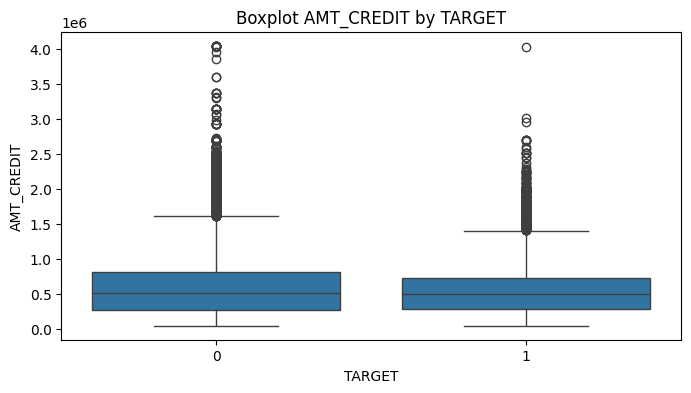

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=app_train, x="TARGET", y="AMT_CREDIT")
plt.title("Boxplot AMT_CREDIT by TARGET")
plt.show()



Correlation matrix – selected numeric features:


,TARGET,AGE_YEARS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.078237,-0.003982,-0.030369,-0.012817,-0.039645,-0.155317,-0.160472,-0.178919
AGE_YEARS,-0.078237,1.000000,-0.027254,0.055438,-0.009444,0.053445,0.600603,0.091998,0.205468
AMT_INCOME_TOTAL,-0.003982,-0.027254,1.000000,0.156870,0.191657,0.159610,0.026232,0.060925,-0.030229
AMT_CREDIT,-0.030369,0.055438,0.156870,1.000000,0.770138,0.986968,0.168429,0.131228,0.043516
AMT_ANNUITY,-0.012817,-0.009444,0.191657,0.770138,1.000000,0.775109,0.119398,0.125804,0.030752
AMT_GOODS_PRICE,-0.039645,0.053445,0.159610,0.986968,0.775109,1.000000,0.175502,0.139367,0.047717
EXT_SOURCE_1,-0.155317,0.600603,0.026232,0.168429,0.119398,0.175502,1.000000,0.213982,0.186846
EXT_SOURCE_2,-0.160472,0.091998,0.060925,0.131228,0.125804,0.139367,0.213982,1.000000,0.109167
EXT_SOURCE_3,-0.178919,0.205468,-0.030229,0.043516,0.030752,0.047717,0.186846,0.109167,1.000000


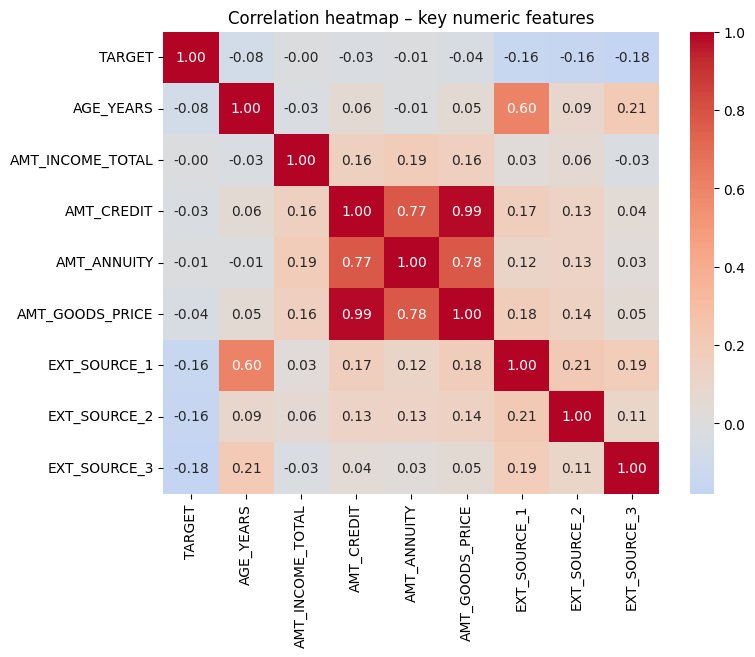

In [ ]:
# ===== CORRELATION MATRIX & HEATMAP (nhóm numeric quan trọng) =====
corr_cols = [
    "TARGET",
    "AGE_YEARS",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3"
]

corr_df = app_train[corr_cols].copy()
corr = corr_df.corr()

print("\nCorrelation matrix – selected numeric features:")
display(corr)

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Correlation heatmap – key numeric features")
plt.show()


- EXT_SOURCE_* thường có tương quan âm khá mạnh với TARGET (vì score cao → rủi ro thấp).

- AMT_CREDIT / AMT_GOODS_PRICE có thể tương quan rất cao với nhau → sau này FE/Model cần chú ý multicollinearity (LogReg).